In [1]:
#import liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,roc_auc_score



In [2]:
#this code to display two data frame horizontal
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)
  

In [3]:
#load data
data=pd.read_csv(r"../input/diabetes-data-set/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# from here you can see min , max,std and  count of each columns
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#to show number of null ,type of data and len of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Show the sum of duplicated in Data 
DuplicatedDataSum = data.duplicated().sum()
print("Sum of the Dublicate in Data",DuplicatedDataSum)


Sum of the Dublicate in Data 0


Sum of the normal in Data  500
Sum of the un normal in Data  268


<AxesSubplot:title={'center':'count (target)'}>

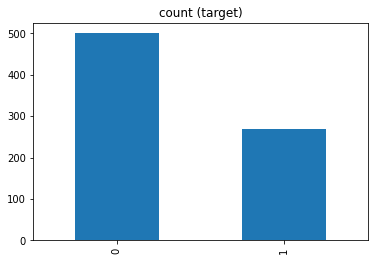

In [7]:
# to  show number of patient and normal in data
print("Sum of the normal in Data ",data['Outcome'].value_counts()[0])
print("Sum of the un normal in Data ",data['Outcome'].value_counts()[1])
data['Outcome'].value_counts().plot(kind='bar', title='count (target)')

In [8]:
#to show unique_value for and columns
columns=data.columns.values
unique=[]
data_unique={'columns':columns,'unique_value':unique}
for column in columns:
    unique.append(len(data[column].unique()))
    
data_unique= pd.DataFrame(data_unique)
# to sort data 
data_unique.sort_values(by=['unique_value'], inplace=True)
data_unique

,columns,unique_value
8,Outcome,2
0,Pregnancies,17
2,BloodPressure,47
3,SkinThickness,51
7,Age,52
1,Glucose,136
4,Insulin,186
5,BMI,248
6,DiabetesPedigreeFunction,517


In [9]:
#to show number of patient for value of Pregnancies
age=[]
diabetes_patient=[]
age_and_diabetes={'age':age,'diabetes_patient':diabetes_patient}

for i in data['Age'].unique():
    diabetes_patient.append(data[data['Age']==i]['Outcome'].sum())
    age.append(i)
    
age_and_diabetes= pd.DataFrame(age_and_diabetes)
# to sort data 
age_and_diabetes.sort_values(by=['diabetes_patient'], inplace=True)


In [10]:
#to show number of patient for every value of Pregnancies
Pregnancies=[]
diabetes_patient=[]
Pregnancies_and_diabetes={'Pregnancies':Pregnancies,'diabetes_patient':diabetes_patient}

for i in data['Pregnancies'].unique():
    #print(data[data['continent']==i]['gdp_cap'].sum(),i)
    diabetes_patient.append(data[data['Pregnancies']==i]['Outcome'].sum())
    Pregnancies.append(i)
    
Pregnancies_and_diabetes= pd.DataFrame(Pregnancies_and_diabetes)
# to sort data 
Pregnancies_and_diabetes.sort_values(by=['diabetes_patient'], inplace=True)



In [11]:
#to display to columns age_and_diabetes,Pregnancies_and_diabetes
display_side_by_side(age_and_diabetes,Pregnancies_and_diabetes ,titles=['age_and_diabetes','Pregnancies_and_diabetes'])

,age,diabetes_patient
51,68,0
49,64,0
48,81,0
47,72,0
45,63,0
37,69,0
40,65,0
26,48,1
36,61,1
39,55,1


In [12]:
# the data show as age increases ,cases decreasese
# the data show as Pregnancies increases ,cases decreasese

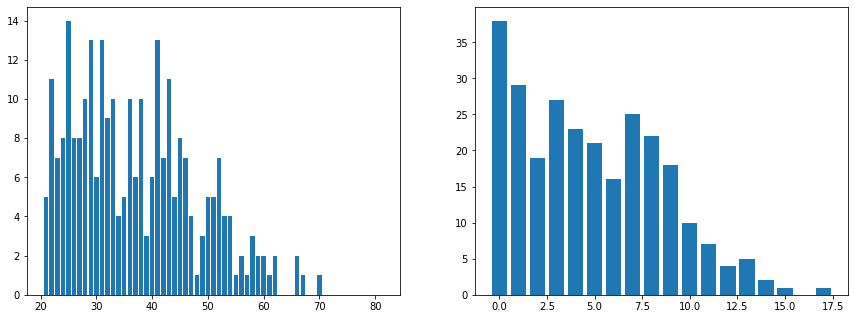

In [13]:
# blot two data frame age_and_diabetes,Pregnancies_and_diabetes
fig,axs=plt.subplots(1,2)

axs[0].bar( age_and_diabetes['age'],age_and_diabetes['diabetes_patient'])
axs[1].bar(Pregnancies_and_diabetes['Pregnancies'], height = Pregnancies_and_diabetes['diabetes_patient'])
plt.subplots_adjust(left=0,right=1.9,bottom=0,top=1)

plt.show()


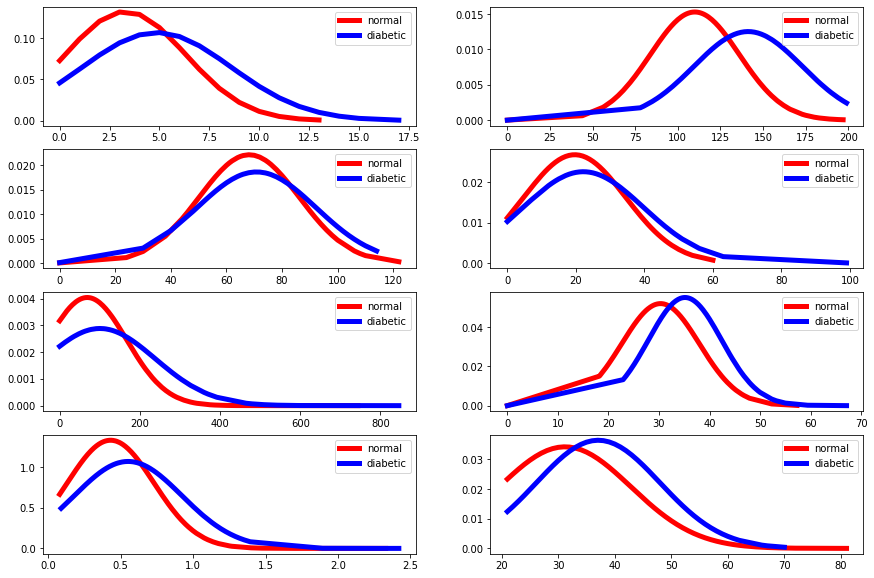

In [14]:
#to plot normal distrbution for normal sample and patient sample for each columns
fig,axs=plt.subplots(4,2)
feature=list(data.columns)
index=-1
a={index:i for index,i in enumerate(data.columns.values)}
for row in range(4):
    for columns in range(2):
        index+=1

        data.sort_values(by=a[index], inplace=True)
        normal=data[data['Outcome']==0]
        diabetic=data[data['Outcome']==1]
        fit = stats.norm.pdf(normal[a[index]], np.mean(normal[a[index]]), np.std(normal[a[index]]))  #this is a fitting indeed
        axs[row,columns].plot(normal[a[index]],fit, color='r', linewidth=5, label="normal")
        fit = stats.norm.pdf(diabetic[a[index]], np.mean(diabetic[a[index]]), np.std(diabetic[a[index]]))
        axs[row,columns].plot(diabetic[a[index]],fit, color='b', linewidth=5,label="diabetic")
        axs[row,columns].legend(loc=1)

        
plt.subplots_adjust(left=0,right=1.9,bottom=0,top=1.9)


In [15]:
#the plot show the data is too intertwined

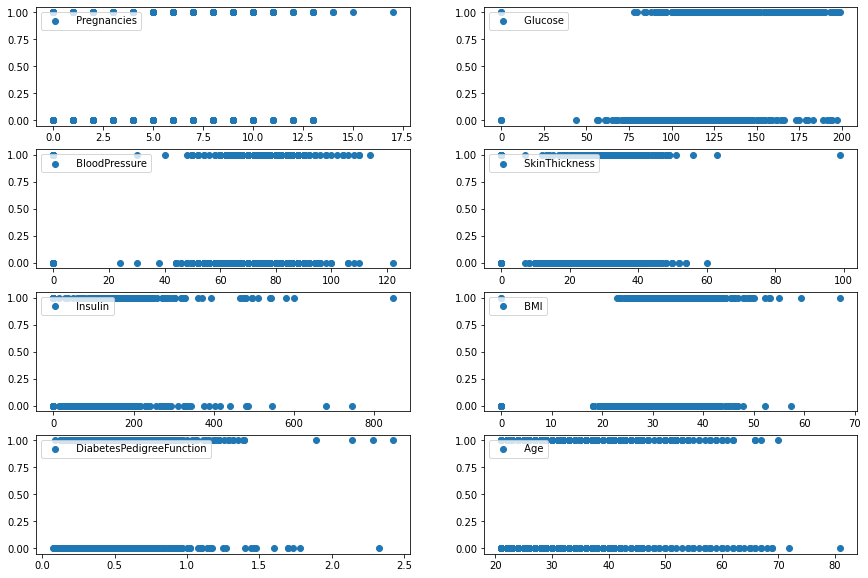

In [16]:
#plot each columns with outcome
fig,axs=plt.subplots(4,2)
feature=list(data.columns)
index=-1
for row in range(4):
    for columns in range(2):
        index+=1
        axs[row,columns].scatter(data[feature[index]],data['Outcome'], label=f" {feature[index]}")
        axs[row,columns].legend(loc=2)

plt.subplots_adjust(left=0,right=1.9,bottom=0,top=1.9)


<AxesSubplot:>

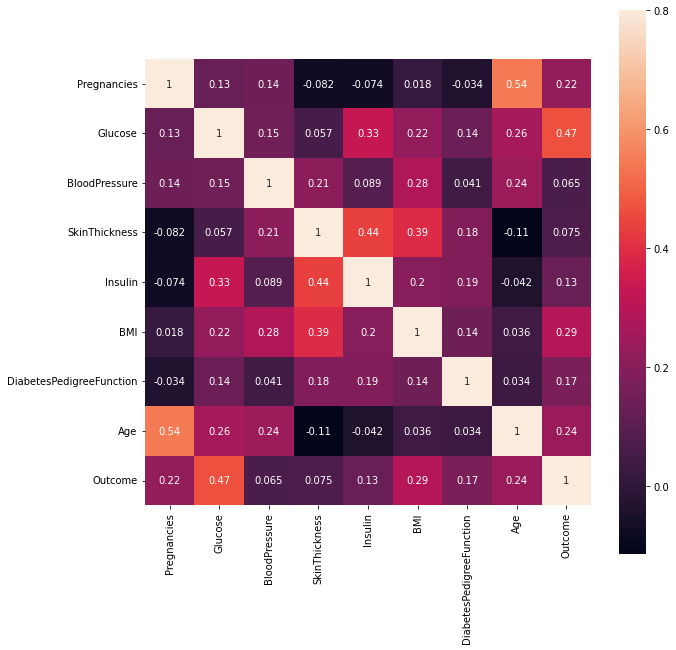

In [17]:
#plot heatmap for correration
corrmat = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True)

In [18]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']
print('len of data ',len(data))

len of data  768


In [19]:
# len data is very small and therefore we use algrithm not complicated like logistic regreesion

In [20]:
# we split data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=0)
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (668, 8)
x_test shape is: (100, 8)
y_train shape is: (668,)
y_test shape is: (100,)


In [21]:
#this complicated algrithm and the expected we will suffer from over fitting
RandomForestRegressorModel = RandomForestClassifier(n_estimators=15,max_depth=10, random_state=33,)
RandomForestRegressorModel.fit(x_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(x_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(x_test, y_test))
print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)
print('----------------------------------------------------')

y_pred = RandomForestRegressorModel.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Random Forest Regressor Train Score is :  0.9895209580838323
Random Forest Regressor Test Score is :  0.72
Random Forest Regressor No. of features are :  8
----------------------------------------------------
Predicted Value for Random Forest Regressor is :  [0 0 1 0 1 0 1 0 0 0]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
#the expected is true and algrithm suffer from over fitting

In [23]:
#we use LogisticRegression to overcome over fitting
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()



# fit the model with data
model.fit(x_train,y_train)

#
y_pred=model.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print('LogisticRegression Train Score is : ' , model.score(x_train, y_train))

print('LogisticRegression Test Score is : ' , model.score(x_test, y_test))


LogisticRegression Train Score is :  0.781437125748503
LogisticRegression Test Score is :  0.77


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


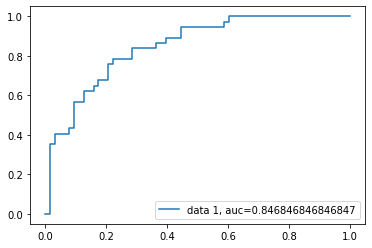

In [24]:
# we plot auc
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, thre = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<AxesSubplot:>

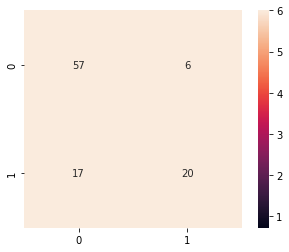

In [25]:
confusion_matrix =confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, vmax=.8, square=True,annot=True)

In [26]:
#to know index of False_positive in data
Covid=y_test[y_test==1]
Covid=list(Covid.index)

Normal=y_test[y_pred==0]
Normal=list(Normal.index)

False_positive=[ e for e in Covid if e in Normal ]

In [27]:
len(False_positive)

17

In [28]:
#to know index of False_negative in data

Covid=y_test[y_test==0]
Covid=list(Covid.index)

Normal=y_test[y_pred==1]
Normal=list(Normal.index)
False_negative=[ e for e in Covid if e in Normal ]

In [29]:
len(False_negative)

6

In [30]:
# we display False_positive and False_negative
display_side_by_side(data.loc[False_positive],data.loc[False_negative] ,titles=['False_positive','False_negative'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
219,5,112,66,0,0,37.8,0.261,41,1
199,4,148,60,27,318,30.9,0.150,29,1
730,3,130,78,23,79,28.4,0.323,34,1
301,2,144,58,33,135,31.6,0.422,25,1
476,2,105,80,45,191,33.7,0.711,29,1
296,2,146,70,38,360,28.0,0.337,29,1
326,1,122,64,32,156,35.1,0.692,30,1
322,0,124,70,20,0,27.4,0.254,36,1
165,6,104,74,18,156,29.9,0.722,41,1
312,2,155,74,17,96,26.6,0.433,27,1


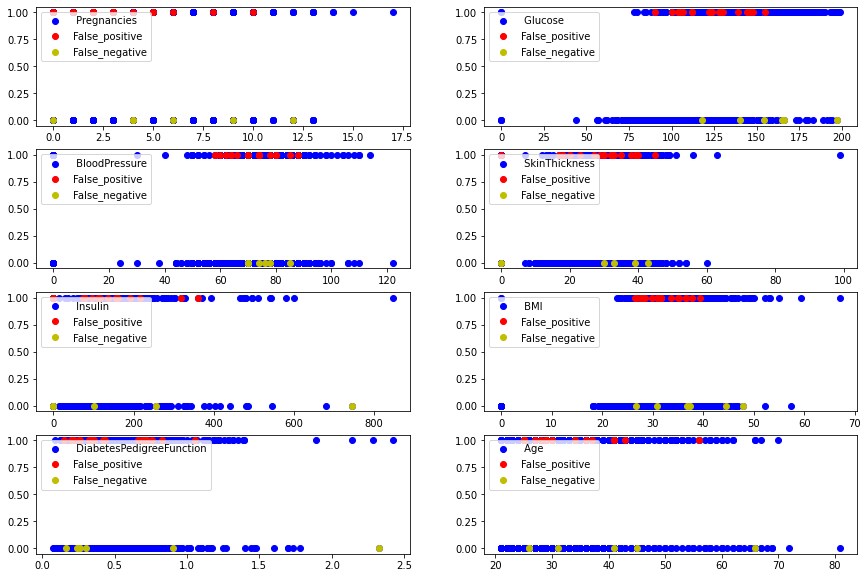

In [31]:
# we show data , show False_positive and False_negative
fig,axs=plt.subplots(4,2)
feature=list(data.columns)
index=-1
for row in range(4):
    for columns in range(2):
        index+=1
        axs[row,columns].scatter(data[feature[index]],data['Outcome'], label=f" {feature[index]}",c='b')
        axs[row,columns].scatter(data.loc[False_positive][feature[index]],data.loc[False_positive]['Outcome'], label="False_positive",c='r')
        axs[row,columns].scatter(data.loc[False_negative][feature[index]],data.loc[False_negative]['Outcome'], label="False_negative",c='y')
        axs[row,columns].legend(loc=2)

plt.subplots_adjust(left=0,right=1.9,bottom=0,top=1.9)

In [32]:
#we will detect outlier

In [33]:
outlier_sample=[]
drop = data[(data['DiabetesPedigreeFunction']>=2)&(data['Outcome']>0)].index.values
outlier_sample.extend([drop][0])
drop = data[(data['Insulin']>=800)&(data['Outcome']==1)].index.values
outlier_sample.extend([drop][0])

print('the outlier is ',outlier_sample)

the outlier is  [445, 370, 4, 13]


In [34]:
data.drop(outlier_sample, axis=0, inplace=True)

In [35]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']
print('len of data ',len(data))

len of data  764


In [36]:
# we split data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=0)
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (664, 8)
x_test shape is: (100, 8)
y_train shape is: (664,)
y_test shape is: (100,)


In [37]:
#we use LogisticRegression to overcome over fitting

model = LogisticRegression()



# fit the model with data
model.fit(x_train,y_train)

#
y_pred=model.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print('LogisticRegression Train Score is : ' , model.score(x_train, y_train))

print('LogisticRegression Test Score is : ' , model.score(x_test, y_test))

LogisticRegression Train Score is :  0.7756024096385542
LogisticRegression Test Score is :  0.81


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [38]:
#we see the accuracy increase when we delete outllier

thank you